# Feature Engineering Assignment
Using Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
from sklearn import datasets, model_selection, preprocessing

In [2]:
import pandas as pd

# Load the Titanic dataset from the CSV file
titanic_df = pd.read_csv("titanic.csv")

# Display the feature names
print("Feature Names in Titanic dataset:")
print(titanic_df.columns)

Feature Names in Titanic dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


1. Handle Missing Value

In [3]:
import pandas as pd

# Load the Titanic dataset (make sure the file is in the same directory or specify the correct path)
titanic_df = pd.read_csv('titanic.csv')

# Display the original Titanic DataFrame with Missing Values
print("Original Titanic DataFrame with Missing Values:")
print(titanic_df)

Original Titanic DataFrame with Missing Values:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                   

In [4]:
# Impute missing values for 'Sex' (categorical) with mode
titanic_df['Sex'] = titanic_df['Sex'].fillna(titanic_df['Sex'].mode()[0])

# Impute missing values for 'Age' (numerical) with mean
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# Impute missing values for 'Embarked' (categorical) with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Impute missing values for 'Fare' (numerical) with median
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())

# Display the DataFrame after imputing missing values
print("\nTitanic DataFrame after imputing missing values:")
print(titanic_df)


Titanic DataFrame after imputing missing values:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                             

 2. handle categorical value

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load Titanic dataset (Ensure titanic_df is loaded)
# For the sake of this example, I'll assume titanic_df is already available.

# Handle missing values by filling them with mode or mean, depending on the feature
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())  # Fill Age with the mean value
titanic_df['Sex'] = titanic_df['Sex'].fillna(titanic_df['Sex'].mode()[0])  # Fill Sex with the most frequent value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])  # Fill Embarked with mode

# Label Encoding for Ordinal Data ('Pclass')
label_encoder = LabelEncoder()
titanic_df['Pclass'] = label_encoder.fit_transform(titanic_df['Pclass'])

# One-Hot Encoding for Nominal Data ('Sex' and 'Embarked')
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['Sex', 'Embarked'])],  # Drop first to avoid multicollinearity
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply the transformation
transformed_data = preprocessor.fit_transform(titanic_df)

# Convert back to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
titanic_df_encoded = pd.DataFrame(transformed_data, columns=feature_names)

# Display the final encoded DataFrame
print(titanic_df_encoded)

    onehot__Sex_male onehot__Embarked_Q onehot__Embarked_S  \
0                1.0                0.0                1.0   
1                0.0                0.0                0.0   
2                0.0                0.0                1.0   
3                0.0                0.0                1.0   
4                1.0                0.0                1.0   
..               ...                ...                ...   
886              1.0                0.0                1.0   
887              0.0                0.0                1.0   
888              0.0                0.0                1.0   
889              1.0                0.0                0.0   
890              1.0                1.0                0.0   

    remainder__PassengerId remainder__Survived remainder__Pclass  \
0                        1                   0                 2   
1                        2                   1                 0   
2                        3                   1     

3. Scale the features

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Assuming the Titanic dataset is already loaded into titanic_df
# Fill missing values (or handle them according to your logic before scaling)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())  # Fill Age with the mean value
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].mean())  # Fill Fare with the mean value

# Select numerical columns for scaling
numerical_columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

# Apply scalers to numerical columns
df_standard = pd.DataFrame(standard_scaler.fit_transform(titanic_df[numerical_columns]), columns=numerical_columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(titanic_df[numerical_columns]), columns=numerical_columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(titanic_df[numerical_columns]), columns=numerical_columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(titanic_df[numerical_columns]), columns=numerical_columns)

# Log Transformation (Handling zero by adding 1)
df_log = np.log1p(titanic_df[numerical_columns])

# Display results
print("\nStandard Scaled Data:\n", df_standard.head())
print("\nMinMax Scaled Data:\n", df_minmax.head())
print("\nRobust Scaled Data:\n", df_robust.head())
print("\nMaxAbs Scaled Data:\n", df_maxabs.head())
print("\nLog Transformed Data:\n", df_log.head())


Standard Scaled Data:
         Age      Fare    Pclass     SibSp     Parch
0 -0.592481 -0.502445  0.827377  0.432793 -0.473674
1  0.638789  0.786845 -1.566107  0.432793 -0.473674
2 -0.284663 -0.488854  0.827377 -0.474545 -0.473674
3  0.407926  0.420730 -1.566107  0.432793 -0.473674
4  0.407926 -0.486337  0.827377 -0.474545 -0.473674

MinMax Scaled Data:
         Age      Fare  Pclass  SibSp  Parch
0  0.271174  0.014151     1.0  0.125    0.0
1  0.472229  0.139136     0.0  0.125    0.0
2  0.321438  0.015469     1.0  0.000    0.0
3  0.434531  0.103644     0.0  0.125    0.0
4  0.434531  0.015713     1.0  0.000    0.0

Robust Scaled Data:
         Age      Fare  Pclass  SibSp  Parch
0 -0.592240 -0.312011     0.0    1.0    0.0
1  0.638529  2.461242    -2.0    1.0    0.0
2 -0.284548 -0.282777     0.0    0.0    0.0
3  0.407760  1.673732    -2.0    1.0    0.0
4  0.407760 -0.277363     0.0    0.0    0.0

MaxAbs Scaled Data:
       Age      Fare  Pclass  SibSp  Parch
0  0.2750  0.014151     1.0 

4. Handling Outliers

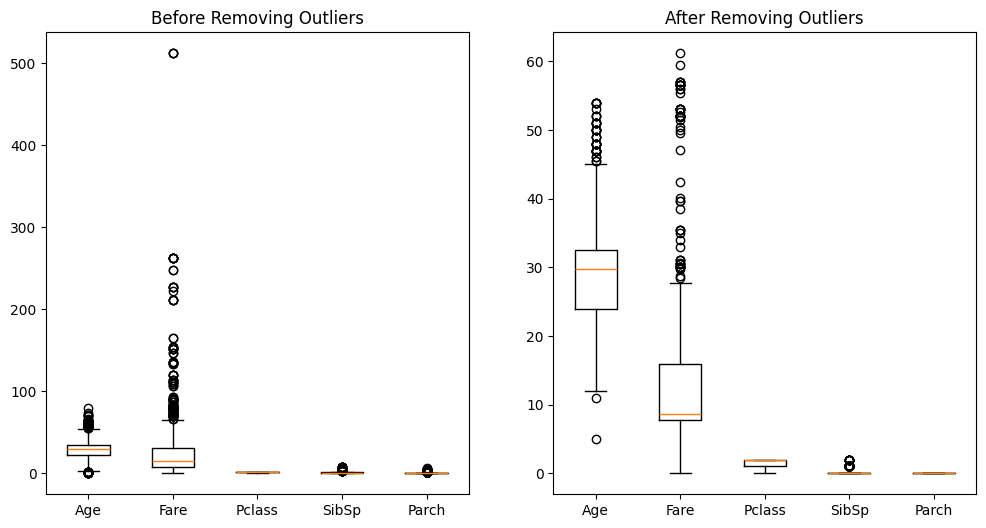


Data after removing outliers:
   PassengerId  Survived  Pclass  \
0            1         0       2   
2            3         1       2   
3            4         1       0   
4            5         0       2   
5            6         0       2   

                                           Name     Sex        Age  SibSp  \
0                       Braund, Mr. Owen Harris    male  22.000000      1   
2                        Heikkinen, Miss. Laina  female  26.000000      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1   
4                      Allen, Mr. William Henry    male  35.000000      0   
5                              Moran, Mr. James    male  29.699118      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            3308

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset (replace with your actual dataset)
# titanic_df = pd.read_csv('path_to_titanic.csv')  # Uncomment this line to load your dataset

# Fill missing values for numerical columns
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())  # Fill Age with the mean value
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].mean())  # Fill Fare with the mean value

# Select numerical columns for outlier removal
numerical_columns = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# Initialize a new DataFrame for filtered data
df_filtered = titanic_df.copy()

# Loop through each numerical column and remove outliers
for column in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot before removing outliers
ax1.boxplot(titanic_df[numerical_columns])
ax1.set_title("Before Removing Outliers")
ax1.set_xticklabels(numerical_columns)

# Boxplot after removing outliers
ax2.boxplot(df_filtered[numerical_columns])
ax2.set_title("After Removing Outliers")
ax2.set_xticklabels(numerical_columns)

plt.show()

# Display data after removing outliers
print("\nData after removing outliers:")
print(df_filtered.head())

5. Feature selection

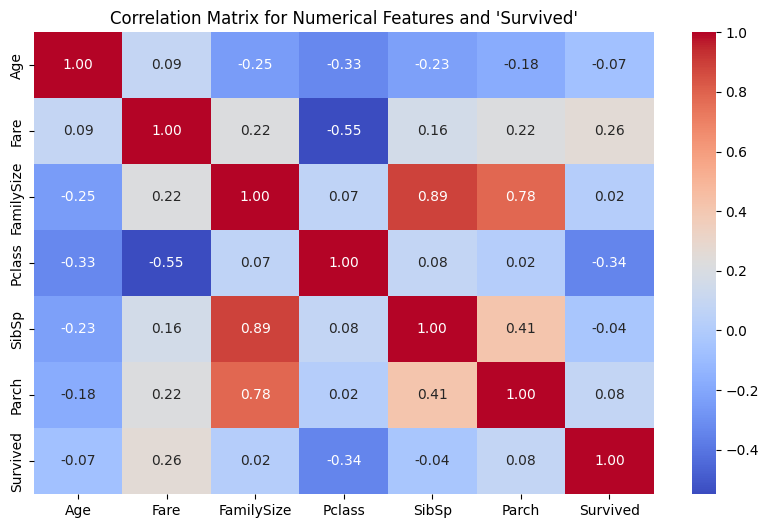

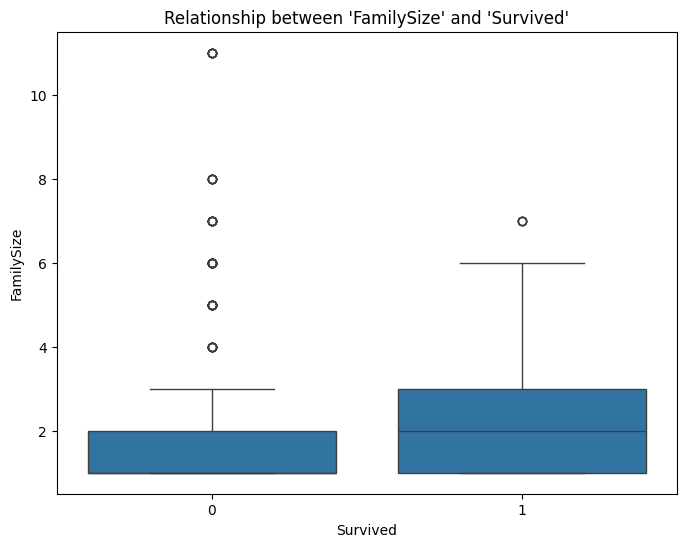


Selected Features and Target:
    Age     Fare  FamilySize  Pclass  SibSp  Parch  Sex  Embarked  Survived
0  22.0   7.2500           2       2      1      0    1         2         0
1  38.0  71.2833           2       0      1      0    0         0         1
2  26.0   7.9250           1       2      0      0    0         2         1
3  35.0  53.1000           2       0      1      0    0         2         1
4  35.0   8.0500           1       2      0      0    1         2         0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
# titanic_df = pd.read_csv('path_to_titanic.csv')  # Uncomment this line to load your dataset

# Fill missing values for numerical columns
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())  # Fill Age with the mean value
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].mean())  # Fill Fare with the mean value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])  # Fill Embarked with the mode value

# Fill missing categorical data using mode (e.g., 'Embarked' and 'Sex' columns)
titanic_df['Sex'] = titanic_df['Sex'].fillna(titanic_df['Sex'].mode()[0])  # Fill Sex with the mode value

# Create new feature "FamilySize" by combining "SibSp" (siblings/spouse) and "Parch" (parents/children)
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1  # Add 1 for the passenger themselves

# Feature Selection (checking correlation with the target 'Survived')
# Let's check correlation of numerical features with 'Survived'
numerical_features = ['Age', 'Fare', 'FamilySize', 'Pclass', 'SibSp', 'Parch']
correlations = titanic_df[numerical_features + ['Survived']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numerical Features and 'Survived'")
plt.show()

# Now, let's check the relationship of the new feature 'FamilySize' with 'Survived'
# We will visualize the relationship using a boxplot for better interpretation
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='FamilySize', data=titanic_df)
plt.title("Relationship between 'FamilySize' and 'Survived'")
plt.show()

# Encode categorical variables using Label Encoding (for 'Sex' and 'Embarked')
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

# Select features for modeling (you can experiment with different sets)
selected_features = ['Age', 'Fare', 'FamilySize', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']

# Display the selected features and the target variable 'Survived'
print("\nSelected Features and Target:")
print(titanic_df[selected_features + ['Survived']].head())

# Optionally, you can proceed to model training here using these selected features
# For example, you could use Logistic Regression, Random Forest, etc.

6. PCA

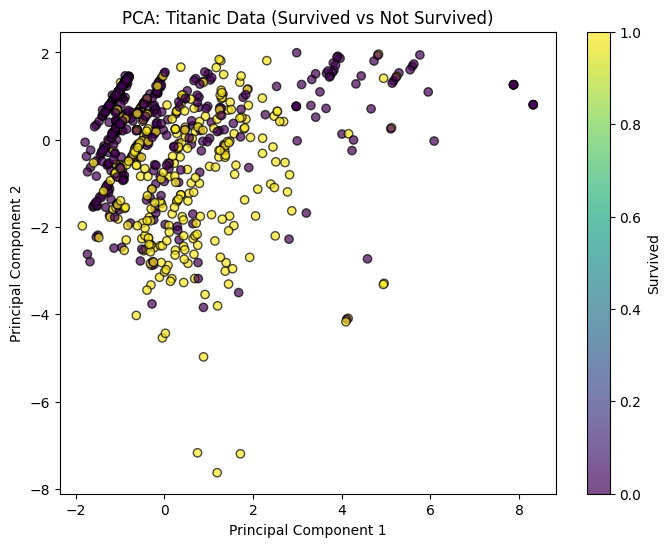


Explained variance ratio by each component: [0.33131625 0.22802083]

Principal Components (loadings):
[[-0.22071023  0.19473532  0.59860527  0.02008642  0.51403976  0.49496587
  -0.2118998   0.02244533]
 [-0.33846223 -0.57036218  0.04823689  0.62796507  0.08644458 -0.02170811
   0.21797349  0.32864422]]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load Titanic dataset (Assuming you have already loaded and preprocessed the data)
# titanic_df = pd.read_csv('path_to_titanic.csv')  # Uncomment to load your dataset

# Fill missing values for numerical columns
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Fill missing categorical data (e.g., 'Sex' column)
titanic_df['Sex'] = titanic_df['Sex'].fillna(titanic_df['Sex'].mode()[0])

# Create new feature "FamilySize" by combining "SibSp" and "Parch"
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1  # Add 1 for the passenger themselves

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

# Select features for PCA
selected_features = ['Age', 'Fare', 'FamilySize', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']

# Separate the features and target
X = titanic_df[selected_features]
y = titanic_df['Survived']

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Visualize the data in the PCA-reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title("PCA: Titanic Data (Survived vs Not Survived)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Survived')
plt.show()

# Display the explained variance ratio to see how much variance is explained by each component
print("\nExplained variance ratio by each component:", pca.explained_variance_ratio_)

# Show the principal components
print("\nPrincipal Components (loadings):")
print(pca.components_)